1. Download data from the link.
2. Reformat categorical columns by mapping with appropriate values.
3. Replace the maximum value of income, assests, and debt columns with NaNs.
4. Replace the NaNs in the dataframe with 0.
5. Extract only those rows in the column status who are either ok or default as value.
6. Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.
7. Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.
8. Finally delete the target variable from the train/val/test dataframe.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'
# !wget $data

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
# df.income.max()
# df.income.replace(to_replace=99999999, value=np.nan)
# df.income.replace(to_replace=99999999, value=np.nan).max()

In [11]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
 
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [13]:
df = df[df.status != 'unk'].reset_index(drop=True)

### data splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
df_train.status.value_counts()

status
ok         2068
default     782
Name: count, dtype: int64

In [17]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'         

# just take one record to test
xi = df_train.iloc[333].to_dict()
assess_risk(xi)

'ok'

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [20]:
train_dicts = df_train.infer_objects(copy=False).to_dict(orient='records')
train_dicts[:5]

[{'seniority': 15,
  'home': 'owner',
  'time': 60,
  'age': 34,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 45,
  'income': 82.0,
  'assets': 3500.0,
  'debt': 0.0,
  'amount': 750,
  'price': 1624},
 {'seniority': 7,
  'home': 'parents',
  'time': 60,
  'age': 30,
  'marital': 'single',
  'records': 'no',
  'job': 'fixed',
  'expenses': 35,
  'income': 95.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 900,
  'price': 1158},
 {'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 47,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 60,
  'income': 133.0,
  'assets': 3000.0,
  'debt': 0.0,
  'amount': 360,
  'price': 360},
 {'seniority': 5,
  'home': 'owner',
  'time': 48,
  'age': 39,
  'marital': 'married',
  'records': 'yes',
  'job': 'freelance',
  'expenses': 45,
  'income': 100.0,
  'assets': 30000.0,
  'debt': 0.0,
  'amount': 1550,
  'price': 2294},
 {'seniority': 14,
  'home': 'owner',
  'time': 36,
  'age': 40,
  '

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.4e+01, 7.5e+02, 3.5e+03, ..., 0.0e+00, 1.5e+01, 6.0e+01],
       [3.0e+01, 9.0e+02, 0.0e+00, ..., 0.0e+00, 7.0e+00, 6.0e+01],
       [4.7e+01, 3.6e+02, 3.0e+03, ..., 0.0e+00, 1.0e+01, 3.6e+01],
       ...,
       [1.9e+01, 4.0e+02, 0.0e+00, ..., 0.0e+00, 1.0e+00, 2.4e+01],
       [4.3e+01, 2.5e+03, 1.8e+04, ..., 0.0e+00, 1.5e+01, 4.8e+01],
       [2.7e+01, 4.5e+02, 5.0e+03, ..., 1.0e+00, 1.2e+01, 4.8e+01]],
      shape=(2850, 29))

In [22]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
val_dicts = df_val.infer_objects(copy=False).to_dict(orient='records')
# transform dicts into numerical feature metrix
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.6565211267605635)

In [24]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

In [25]:
# Decision Stump
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.7700033886231307
val 0.7477511737089203


In [26]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [27]:
from sklearn.tree import export_text
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0



In [28]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



### Decision Tree Parameter Tuning

In [29]:
depths = [1,2,3,4,5,6,10,15,20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.607
   2 -> 0.676
   3 -> 0.748
   4 -> 0.772
   5 -> 0.771
   6 -> 0.779
  10 -> 0.704
  15 -> 0.661
  20 -> 0.654
None -> 0.640


In [30]:
scores = []
for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.639394
1,4,2,0.664915
2,4,5,0.725695
3,4,10,0.767404
4,4,15,0.777502


In [31]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
23,6,20,0.797568
14,5,20,0.796014
5,4,20,0.791972
15,5,100,0.785127
24,6,100,0.785127


In [32]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.639  0.639  0.650
2                 0.665  0.672  0.676
5                 0.726  0.726  0.730
10                0.767  0.761  0.762
15                0.778  0.781  0.780
20                0.792  0.796  0.798
100               0.785  0.785  0.785
200               0.784  0.784  0.784
500               0.697  0.697  0.697

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

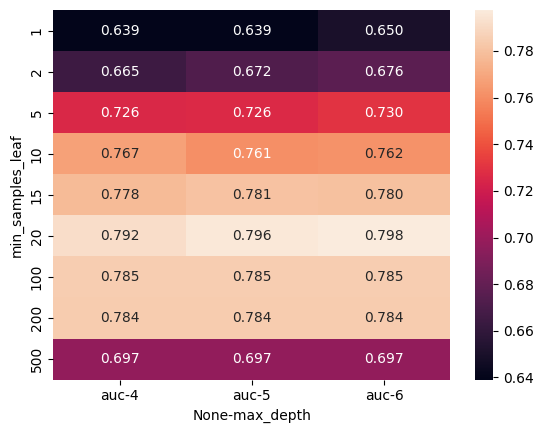

In [33]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [34]:
scores = []
 
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
 
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
32,7.0,20,0.797113
59,20.0,20,0.796108
68,NaN,20,0.795366
5,4.0,20,0.794878
14,5.0,20,0.794423


In [35]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.637  0.637  0.629  0.632  0.648  0.641  0.663  0.642
2                 0.670  0.668  0.680  0.672  0.664  0.663  0.664  0.652
5                 0.734  0.728  0.739  0.737  0.728  0.728  0.728  0.732
10                0.760  0.761  0.761  0.768  0.762  0.768  0.766  0.764
15                0.783  0.782  0.783  0.782  0.780  0.782  0.780  0.783
20                0.795  0.795  0.794  0.793  0.797  0.794  0.793  0.796
100               0.785  0.785  0.785  0.785  0.785  0.785  0.785  0.785
200               0.784  0.784  0.784  0.784  0.784  0.784  0.784  0.784
500               0.697  0.697  0.697  0.697  0.697  0.697  0.697  0.697

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

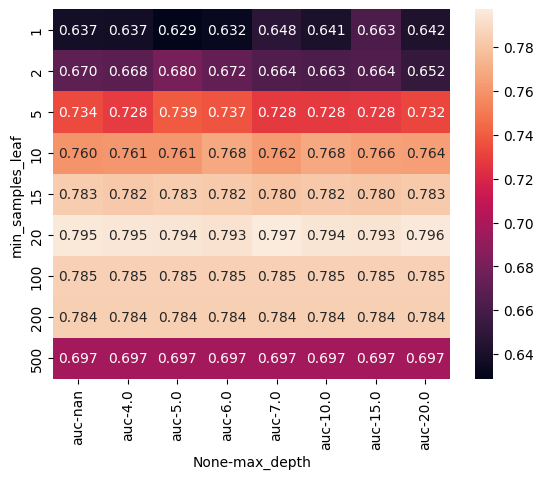

In [36]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [37]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# n_estimators - number of models we want to use
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7948028169014084)

In [40]:
rf.predict_proba(X_val[[0]])

array([[0.7, 0.3]])

#### Tuning random forest

In [41]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimator', 'auc'])
df_scores

,n_estimator,auc
0,10,0.790455
1,20,0.804300
2,30,0.809362
3,40,0.813127
4,50,0.817582
5,60,0.819629
6,70,0.820770
7,80,0.821333
8,90,0.822235
9,100,0.821723


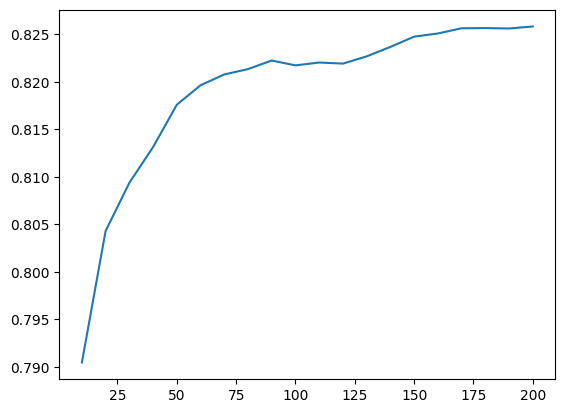

In [42]:
plt.plot(df_scores.n_estimator, df_scores.auc)

In [43]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.806498
1,5,20,0.808817
2,5,30,0.812812
3,5,40,0.812286
4,5,50,0.812681


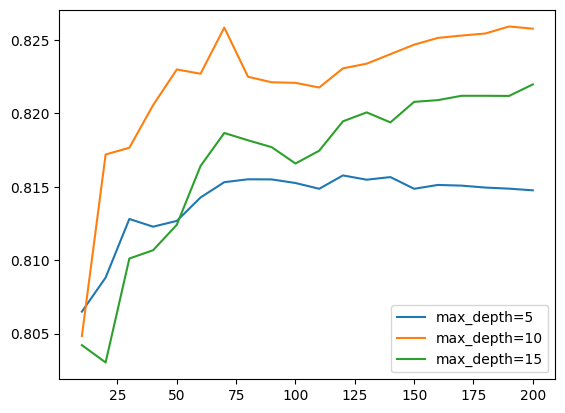

In [44]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

In [45]:
max_depth = 10
# find bestmin_samples_leaf
scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((s, n, auc))
 
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [46]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

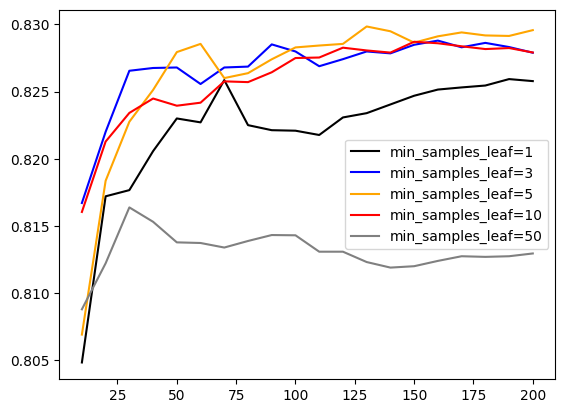

In [47]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()

In [48]:
min_samples_leaf = 3

In [50]:
rf = RandomForestClassifier(n_estimators=100,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)